# Import libraries requires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from glob import glob
import seaborn as sns
from PIL import Image
import keras
from keras.utils.np_utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.utils import resample
from keras.models import load_model

# Default input size
SIZE = 32

# Loading model and dataset

In [2]:
# Load the multi-label classification model 
model = load_model('Label_CNN_Classifier.h5')

In [3]:
# read the testing dataset
test = pd.read_csv('data_labels_extraData.csv')

# display the first 5 rows
test.head()

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0


In [4]:
# read images based on ImageName from CSV file
path = "patch_images/"

# define the path and add as a new column 
test['path'] = path + test['ImageName']

# check the dataframe
test.head()

,InstanceID,patientID,ImageName,isCancerous,path
0,12681,61,12681.png,0,patch_images/12681.png
1,12682,61,12682.png,0,patch_images/12682.png
2,12683,61,12683.png,0,patch_images/12683.png
3,12684,61,12684.png,0,patch_images/12684.png
4,12685,61,12685.png,0,patch_images/12685.png


In [5]:
# Use the path to read image and convert image into numpy array
test['image'] = test['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [6]:
# check dataframe
test

,InstanceID,patientID,ImageName,isCancerous,path,image
0,12681,61,12681.png,0,patch_images/12681.png,"[[[165, 125, 180], [148, 110, 169], [161, 123,..."
1,12682,61,12682.png,0,patch_images/12682.png,"[[[241, 236, 240], [242, 235, 239], [241, 232,..."
2,12683,61,12683.png,0,patch_images/12683.png,"[[[250, 241, 253], [255, 245, 255], [246, 236,..."
3,12684,61,12684.png,0,patch_images/12684.png,"[[[255, 238, 255], [247, 228, 246], [239, 221,..."
4,12685,61,12685.png,0,patch_images/12685.png,"[[[222, 198, 219], [229, 205, 226], [224, 194,..."
...,...,...,...,...,...,...
10379,20028,99,20028.png,0,patch_images/20028.png,"[[[243, 240, 242], [244, 241, 242], [244, 241,..."
10380,20029,99,20029.png,0,patch_images/20029.png,"[[[206, 172, 214], [218, 185, 226], [221, 187,..."
10381,20030,99,20030.png,0,patch_images/20030.png,"[[[243, 242, 242], [243, 241, 242], [243, 240,..."
10382,20031,99,20031.png,0,patch_images/20031.png,"[[[246, 240, 248], [246, 240, 249], [246, 240,..."


# Extract Training Data using Train_Split_Test

In [7]:
# X_val is value of images numpy array
X_val = np.asarray(test['image'].tolist())

# Scale values to 0:1
X_val = X_val/255.

In [8]:
# predict the result of image on X_val
y = model.predict(X_val)
y_pre = np.argmax(y, axis = 1) 
print("The class is",y_pre)
test["cellType"] = y_pre

The class is [0 0 0 ... 0 2 3]


In [9]:
# check the prediction result on dataframe
test.head(10)

,InstanceID,patientID,ImageName,isCancerous,path,image,cellType
0,12681,61,12681.png,0,patch_images/12681.png,"[[[165, 125, 180], [148, 110, 169], [161, 123,...",0
1,12682,61,12682.png,0,patch_images/12682.png,"[[[241, 236, 240], [242, 235, 239], [241, 232,...",0
2,12683,61,12683.png,0,patch_images/12683.png,"[[[250, 241, 253], [255, 245, 255], [246, 236,...",0
3,12684,61,12684.png,0,patch_images/12684.png,"[[[255, 238, 255], [247, 228, 246], [239, 221,...",0
4,12685,61,12685.png,0,patch_images/12685.png,"[[[222, 198, 219], [229, 205, 226], [224, 194,...",0
5,12686,61,12686.png,0,patch_images/12686.png,"[[[255, 251, 255], [252, 248, 251], [254, 250,...",0
6,12687,61,12687.png,0,patch_images/12687.png,"[[[215, 176, 221], [198, 159, 206], [184, 150,...",1
7,12688,61,12688.png,0,patch_images/12688.png,"[[[222, 211, 220], [228, 220, 229], [238, 232,...",0
8,12689,61,12689.png,0,patch_images/12689.png,"[[[157, 110, 180], [202, 155, 214], [247, 200,...",1
9,12690,61,12690.png,0,patch_images/12690.png,"[[[240, 238, 239], [241, 239, 240], [242, 240,...",1


# Data combination

In [10]:
# read the data_labels_mainData.csv
train = pd.read_csv('data_labels_mainData.csv')
train.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0


In [11]:
# read images based on ImageName from CSV file
path = "patch_images/"

# define the path and add as a new column 
train['path'] = path + train['ImageName']

# check the dataframe
train.head()

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,path
0,22405,1,22405.png,fibroblast,0,0,patch_images/22405.png
1,22406,1,22406.png,fibroblast,0,0,patch_images/22406.png
2,22407,1,22407.png,fibroblast,0,0,patch_images/22407.png
3,22408,1,22408.png,fibroblast,0,0,patch_images/22408.png
4,22409,1,22409.png,fibroblast,0,0,patch_images/22409.png


In [12]:
# Use the path to read image and convert image into numpy array
train['image'] = train['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [13]:
# check dataframe
train

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,path,image
0,22405,1,22405.png,fibroblast,0,0,patch_images/22405.png,"[[[242, 213, 237], [240, 210, 234], [236, 206,..."
1,22406,1,22406.png,fibroblast,0,0,patch_images/22406.png,"[[[222, 176, 212], [224, 175, 211], [230, 181,..."
2,22407,1,22407.png,fibroblast,0,0,patch_images/22407.png,"[[[247, 243, 247], [248, 242, 246], [248, 240,..."
3,22408,1,22408.png,fibroblast,0,0,patch_images/22408.png,"[[[243, 242, 242], [243, 241, 241], [243, 241,..."
4,22409,1,22409.png,fibroblast,0,0,patch_images/22409.png,"[[[188, 129, 188], [187, 127, 185], [186, 126,..."
...,...,...,...,...,...,...,...,...
9891,1625,60,1625.png,epithelial,2,1,patch_images/1625.png,"[[[168, 135, 177], [205, 173, 216], [244, 214,..."
9892,1626,60,1626.png,epithelial,2,1,patch_images/1626.png,"[[[213, 174, 229], [192, 152, 214], [169, 129,..."
9893,1627,60,1627.png,epithelial,2,1,patch_images/1627.png,"[[[173, 139, 191], [190, 160, 204], [206, 180,..."
9894,1628,60,1628.png,epithelial,2,1,patch_images/1628.png,"[[[228, 202, 232], [184, 155, 199], [176, 142,..."


In [14]:
# Combine 2 dataframe mainData and extraData into a single dataframe
final_df = train.append(test)

In [15]:
# Check dataframe
final_df

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,path,image
0,22405,1,22405.png,fibroblast,0,0,patch_images/22405.png,"[[[242, 213, 237], [240, 210, 234], [236, 206,..."
1,22406,1,22406.png,fibroblast,0,0,patch_images/22406.png,"[[[222, 176, 212], [224, 175, 211], [230, 181,..."
2,22407,1,22407.png,fibroblast,0,0,patch_images/22407.png,"[[[247, 243, 247], [248, 242, 246], [248, 240,..."
3,22408,1,22408.png,fibroblast,0,0,patch_images/22408.png,"[[[243, 242, 242], [243, 241, 241], [243, 241,..."
4,22409,1,22409.png,fibroblast,0,0,patch_images/22409.png,"[[[188, 129, 188], [187, 127, 185], [186, 126,..."
...,...,...,...,...,...,...,...,...
10379,20028,99,20028.png,NaN,0,0,patch_images/20028.png,"[[[243, 240, 242], [244, 241, 242], [244, 241,..."
10380,20029,99,20029.png,NaN,0,0,patch_images/20029.png,"[[[206, 172, 214], [218, 185, 226], [221, 187,..."
10381,20030,99,20030.png,NaN,0,0,patch_images/20030.png,"[[[243, 242, 242], [243, 241, 242], [243, 240,..."
10382,20031,99,20031.png,NaN,2,0,patch_images/20031.png,"[[[246, 240, 248], [246, 240, 249], [246, 240,..."


# Data Preparation and Processing

In [16]:
# count value of each cellType
final_df.cellType.value_counts()

2    9956
1    5358
0    3324
3    1642
Name: cellType, dtype: int64

In [17]:
# define new dataframe to store data of each cellType 
final_df_0 = final_df[final_df['cellType'] == 0]
final_df_1 = final_df[final_df['cellType'] == 1]
final_df_2 = final_df[final_df['cellType'] == 2]
final_df_3 = final_df[final_df['cellType'] == 3]

In [18]:
# set the number of data of others cellType = number of data of cellType 2 (balance data)

final_df_balanced_0 = resample(final_df_0, replace=True, n_samples = len(final_df_2), random_state = 42)
final_df_balanced_1 = resample(final_df_1, replace=True, n_samples = len(final_df_2), random_state = 42)
final_df_balanced_3 = resample(final_df_3, replace=True, n_samples = len(final_df_2), random_state = 42)

In [19]:
# combine back to a single dataframe
final_df_balanced = pd.concat([final_df_balanced_0 ,final_df_balanced_1 , final_df_2, final_df_balanced_3])

In [20]:
# check the distribution: All cellTypes should be balanced 
print(final_df_balanced['cellType'].value_counts())

3    9956
2    9956
1    9956
0    9956
Name: cellType, dtype: int64


In [21]:
# Check dataframe
final_df_balanced

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous,path,image
9948,20626,93,20626.png,NaN,0,0,patch_images/20626.png,"[[[132, 104, 170], [155, 128, 189], [222, 205,..."
4375,20207,23,20207.png,fibroblast,0,0,patch_images/20207.png,"[[[199, 134, 193], [174, 105, 168], [150, 79, ..."
6768,3940,42,3940.png,fibroblast,0,0,patch_images/3940.png,"[[[123, 68, 161], [140, 86, 176], [158, 105, 1..."
6099,20567,37,20567.png,fibroblast,0,0,patch_images/20567.png,"[[[228, 153, 200], [225, 150, 199], [232, 157,..."
6064,20531,37,20531.png,fibroblast,0,0,patch_images/20531.png,"[[[236, 180, 235], [224, 167, 223], [215, 157,..."
...,...,...,...,...,...,...,...,...
5397,11759,30,11759.png,others,3,0,patch_images/11759.png,"[[[127, 69, 150], [143, 84, 165], [183, 121, 2..."
4956,18544,26,18544.png,others,3,0,patch_images/18544.png,"[[[244, 162, 195], [223, 143, 178], [208, 133,..."
2772,8690,17,8690.png,others,3,0,patch_images/8690.png,"[[[150, 101, 191], [154, 104, 185], [178, 126,..."
4886,18470,26,18470.png,others,3,0,patch_images/18470.png,"[[[179, 108, 143], [208, 132, 164], [228, 149,..."


# Extract Training Data using Train_Split_Test

In [22]:
# Extract X is value of images numpy array
X = np.asarray(final_df_balanced['image'].tolist())

# Scale values to 0:1
X = X/255.

In [23]:
# Assign the label values to Y
Y = final_df_balanced['cellType']

In [24]:
# Convert the Y into 4 classes 
Y_cat = to_categorical(Y, num_classes = 4)

In [25]:
# Split data 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.2, random_state=42)

# Re-Training CNN Model

In [26]:
batch_size = int(len(x_train)/100)
epochs = 100

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

Epoch 1/100
101/101 - 59s - loss: 0.3522 - acc: 0.8814 - val_loss: 0.1802 - val_acc: 0.9487
Epoch 2/100
101/101 - 56s - loss: 0.2895 - acc: 0.8996 - val_loss: 0.2054 - val_acc: 0.9205
Epoch 3/100
101/101 - 59s - loss: 0.2762 - acc: 0.9029 - val_loss: 0.1556 - val_acc: 0.9512
Epoch 4/100
101/101 - 57s - loss: 0.2471 - acc: 0.9108 - val_loss: 0.1390 - val_acc: 0.9567
Epoch 5/100
101/101 - 57s - loss: 0.2453 - acc: 0.9126 - val_loss: 0.1332 - val_acc: 0.9588
Epoch 6/100
101/101 - 58s - loss: 0.2326 - acc: 0.9158 - val_loss: 0.1473 - val_acc: 0.9525
Epoch 7/100
101/101 - 60s - loss: 0.2200 - acc: 0.9208 - val_loss: 0.1113 - val_acc: 0.9664
Epoch 8/100
101/101 - 60s - loss: 0.2040 - acc: 0.9269 - val_loss: 0.1008 - val_acc: 0.9694
Epoch 9/100
101/101 - 60s - loss: 0.2013 - acc: 0.9281 - val_loss: 0.1612 - val_acc: 0.9411
Epoch 10/100
101/101 - 61s - loss: 0.2075 - acc: 0.9252 - val_loss: 0.1132 - val_acc: 0.9659
Epoch 11/100
101/101 - 61s - loss: 0.1907 - acc: 0.9311 - val_loss: 0.1039 - va

Epoch 90/100
101/101 - 61s - loss: 0.0736 - acc: 0.9742 - val_loss: 0.0975 - val_acc: 0.9681
Epoch 91/100
101/101 - 63s - loss: 0.0811 - acc: 0.9727 - val_loss: 0.1095 - val_acc: 0.9605
Epoch 92/100
101/101 - 62s - loss: 0.0851 - acc: 0.9713 - val_loss: 0.0800 - val_acc: 0.9726
Epoch 93/100
101/101 - 62s - loss: 0.0744 - acc: 0.9738 - val_loss: 0.0861 - val_acc: 0.9728
Epoch 94/100
101/101 - 61s - loss: 0.0714 - acc: 0.9763 - val_loss: 0.0810 - val_acc: 0.9748
Epoch 95/100
101/101 - 64s - loss: 0.0827 - acc: 0.9714 - val_loss: 0.0865 - val_acc: 0.9691
Epoch 96/100
101/101 - 61s - loss: 0.0803 - acc: 0.9729 - val_loss: 0.0882 - val_acc: 0.9716
Epoch 97/100
101/101 - 61s - loss: 0.0730 - acc: 0.9751 - val_loss: 0.0881 - val_acc: 0.9710
Epoch 98/100
101/101 - 61s - loss: 0.0714 - acc: 0.9748 - val_loss: 0.0734 - val_acc: 0.9773
Epoch 99/100
101/101 - 61s - loss: 0.0759 - acc: 0.9736 - val_loss: 0.0717 - val_acc: 0.9779
Epoch 100/100
101/101 - 62s - loss: 0.0775 - acc: 0.9737 - val_loss: 0

In [27]:
# Model Evaluating 
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])
print('Error rate:', score[0])

249/249 [==============================] - 4s 14ms/step - loss: 0.0815 - acc: 0.9729
Test accuracy: 0.9728813767433167


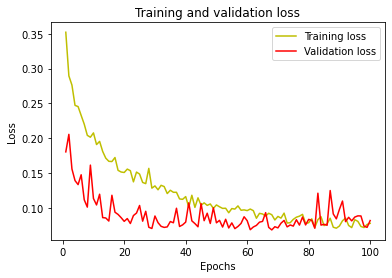

In [28]:
#plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

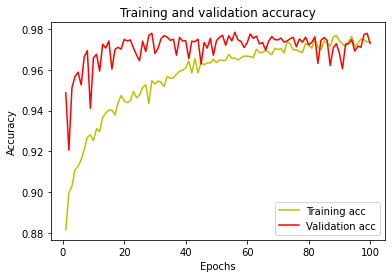

In [29]:
#plot the training and validation accuracy at each epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
# Save Model
model.save('Label_CNN_Classifier_Final.h5')

In [31]:
# Predict 
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

In [32]:
#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print(cm)

[[2008    4   26    0]
 [  25 1903   39   10]
 [  48   53 1850    6]
 [   2    3    0 1988]]


<AxesSubplot:>

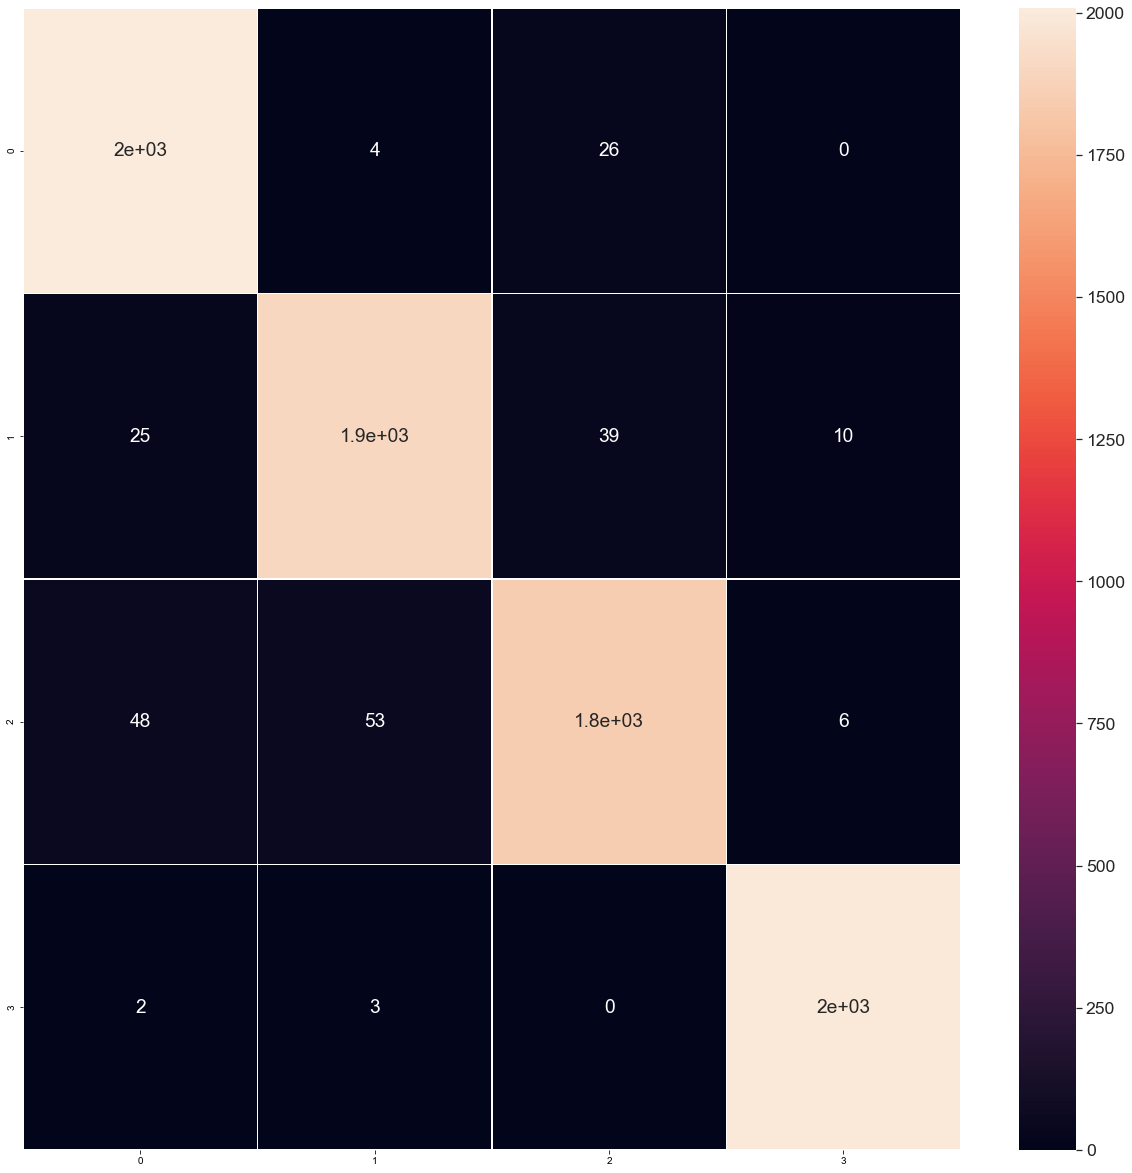

In [33]:
# Plot the heatmap
fig, ax = plt.subplots(figsize=(21,21))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

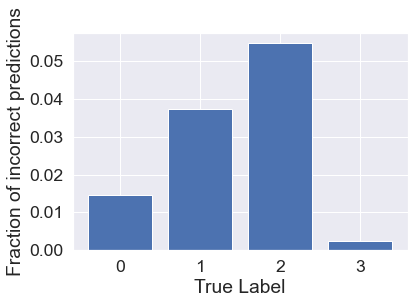

In [34]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(4), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')